 # Wasserstein GAN

# Library

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

import numpy as np

In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,gan

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [4]:
# load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# reshape and normalize

In [5]:
# reshape data for CNN as (28, 28, 1) and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255

# parameter

In [6]:
model_name = "wgan_mnist"
# network parameters
# the latent or z vector is 100-dim
latent_size = 100
# hyper parameters from WGAN paper [2]
n_critic = 5
clip_value = 0.01
batch_size = 64
lr = 5e-5
train_steps = 40000
input_shape = (image_size, image_size, 1)

# model

In [11]:
models = gan.wgan_build(input_shape,image_size,lr,latent_size,model_name)

linear
Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)

In [ ]:
gan.wgan_train(models, x_train, [64,100,5,0.01,40000,"WGAN"])

# load pre-train

In [5]:
generator_pretrain = load_model("WGAN.h5")

2021-06-04 20:31:26,410 [13140] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


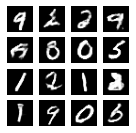

In [6]:
noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
gan.plot_images(generator_pretrain,noise_input=noise_input,show=True,
            model_name="test_outputs")